Финальная настройка данных

В данном файле проводится финальная подготовка данных к input-формату модели

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

Импортируем написанный класс

In [2]:
from create_dataset_m2t_tokens import Code2TestPrepareToInput, input_json_path

Вызываем инциализацию датасета

In [3]:
dataset_m2t_input = Code2TestPrepareToInput(input_json_path)

Время инициализации датасета: 10.226 секунды


Готовим датасет

In [42]:
dataset_m2t_input.prepare_dataset()

100%|██████████| 281060/281060 [00:06<00:00, 45605.68it/s]


Время проверки формата запросов: 6.167 секунды


100%|██████████| 281060/281060 [00:00<00:00, 3878603.40it/s]


Время извлечения глобальных признаков из текста кода: 6.070 секунды


100%|██████████| 281060/281060 [00:00<00:00, 377194.45it/s]


Время извлечения комментариев и описаний из текста кода: 9.208 секунды


100%|██████████| 281060/281060 [00:05<00:00, 49670.77it/s]


Время очистки текста кода: 17.819 секунды


100%|██████████| 281060/281060 [00:02<00:00, 115306.87it/s]


Время получения ast-деревьев на основе текста кода: 116.546 секунды
Время подготовки датасета: 155.812 секунды


100%|██████████| 280458/280458 [00:13<00:00, 20861.98it/s]


Время подготовки focal_method: 42.556 секунды


100%|██████████| 280458/280458 [00:22<00:00, 12419.51it/s]

Время подготовки focal_cls: 58.320 секунды
Время подготовки датасета: 102.123 секунды


Смотрим на датасет

In [115]:
code_dataset = dataset_m2t_input.get_dataset()

In [116]:
code_dataset.head()

,id,query,response,code_features,LANG_TOKEN,focal_method,focal_cls,focal_method_ast,focal_cls_ast,focal_method_info,focal_cls_info,mask_focal_cls_features,flag_empty
0,1,You are a professional python software enginee...,"from microdot import Microdot, Response, abort...","(python, ```python\ndef get(self, key, default...",python,"def get(self, key, default=None): kl = key.low...",<FUNC_TOKEN>,"Module( body=[ FunctionDef( name='get', args=a...",<AST_TOKEN>,<INFO_TOKEN>,<INFO_TOKEN>,True,True
1,2,You are a professional python software enginee...,"from microdot import Microdot, Response, abort...","(python, ```python\ndef get(self, url_pattern)...",python,"def get(self, url_pattern): return self.route(...","class Microdot: def route(self, url_pattern, m...","Module( body=[ FunctionDef( name='get', args=a...","Module( body=[ ClassDef( name='Microdot', base...",<DESCRIPTION_TOKEN> Decorator that is used to ...,"Module( body=[ ClassDef( name='Microdot', base...",False,False
2,3,You are a professional python software enginee...,"from microdot import Microdot, Response, abort...","(python, ```python\ndef post(self, url_pattern...",python,"def post(self, url_pattern): return self.route...","class Microdot: def route(self, url_pattern, m...","Module( body=[ FunctionDef( name='post', args=...","Module( body=[ ClassDef( name='Microdot', base...",<DESCRIPTION_TOKEN> Decorator that is used to ...,"Module( body=[ ClassDef( name='Microdot', base...",False,False
3,4,You are a professional python software enginee...,"from microdot import Microdot, Response, abort...","(python, ```python\ndef mount(self, subapp, ur...",python,"def mount(self, subapp, url_prefix=''): for me...",<FUNC_TOKEN>,"Module( body=[ FunctionDef( name='mount', args...",<AST_TOKEN>,"<DESCRIPTION_TOKEN> Mount a sub-application, o...",<INFO_TOKEN>,True,True
4,5,You are a professional python software enginee...,from pyner.named_entity.corpus import bio2bioe...,"(python, ```python\ndef iob2bio(tags):\n pr...",python,def iob2bio(tags): processed_tags = [] prev_st...,"def split_tag(tag: str): if tag in [""O"", ""-X-""...","Module( body=[ FunctionDef( name='iob2bio', ar...","Module( body=[ FunctionDef( name='split_tag', ...",<DESCRIPTION_TOKEN> should be bio format case1...,"Module( body=[ FunctionDef( name='split_tag', ...",False,False


Смотрим на вид данных, чтобы понимать, что подается в сеть

In [117]:
code_dataset['focal_method'].values[0]

'def get(self, key, default=None): kl = key.lower() return super().get(self.keymap.get(kl, kl), default)'

In [118]:
code_dataset['focal_cls'].values[0]

'<FUNC_TOKEN>'

In [119]:
code_dataset['focal_cls_ast'].values[0]

'<AST_TOKEN>'

In [120]:
code_dataset['focal_cls_info'].values[491]

"Module( body=[ ImportFrom( module='typing', names=[ alias(name='Array'), alias(name='SLArray'), alias(name='ArrayList'), alias(name='SLArrayList')], level=1), FunctionDef( name='slog_multiply', args=arguments( posonlyargs=[], args=[ arg( arg='x', annotation=Name(id='SLArray', ctx=Load())), arg( arg='y', annotation=Name(id='SLArray', ctx=Load()))], kwonlyargs=[], kw_defaults=[], defaults=[]), body=[ Expr( value=Constant(value='Computes the product of two slog array tuples, as another slog array tuple.\\n Signs are multiplied and logs are added.\\n ')), Assign( targets=[ Tuple( elts=[ Name(id='sx', ctx=Store()), Name(id='lx', ctx=Store())], ctx=Store())], value=Name(id='x', ctx=Load())), Assign( targets=[ Tuple( elts=[ Name(id='sy', ctx=Store()), Name(id='ly', ctx=Store())], ctx=Store())], value=Name(id='y', ctx=Load())), Return( value=Tuple( elts=[ BinOp( left=Name(id='sx', ctx=Load()), op=Mult(), right=Name(id='sy', ctx=Load())), BinOp( left=Name(id='lx', ctx=Load()), op=Add(), right=

Нулевая дополнительная информация из *focal_method* и *focal_cls*

In [121]:
print(f"Доля с нулевой дополнительной информацией из focal_cls: {len(code_dataset[code_dataset['focal_cls_info'] == '<INFO_TOKEN>']) / code_dataset.shape[0]:.3f}")
print(f"Доля с нулевой дополнительной информацией из focal_method: {len(code_dataset[code_dataset['focal_method_info'] == '<INFO_TOKEN>']) / code_dataset.shape[0]:.3f}")

Доля с нулевой дополнительной информацией из focal_cls: 0.305
Доля с нулевой дополнительной информацией из focal_method: 0.269


Есть ли у нас такие представления из *focal_cls*, полностью равные FUNC_TOKEN

In [122]:
print(f"Доля с равными <FUNC_TOKEN> focal_cls: {len(code_dataset[code_dataset['focal_cls'] == '<FUNC_TOKEN>']) / code_dataset.shape[0]:.3f}")
print(f"Количество с равными <FUNC_TOKEN> focal_cls: {len(code_dataset[code_dataset['focal_cls'] == '<FUNC_TOKEN>'])}")

Доля с равными <FUNC_TOKEN> focal_cls: 0.305
Количество с равными <FUNC_TOKEN> focal_cls: 85412


Поскольку во второй части нам необходимо дополнительно обучить модель генерировать тесты только для *focal_method*, нам нужно предусмотреть ситуацию, когда не будет данных (или они будут разреженными) в ветке *focal_cls*. Поэтому есть определенный смысл в замене текста в колонках *focal_cls*, *focal_cls_ast* и *focal_cls_info* определённым образом на <FUNC_TOKEN>, <AST_TOKEN> и <INFO_TOKEN>. Таким образом, в некоторой степени применим регуляризацию, подобную той, что используется в Masked Language моделях.

Для замены focal_cls на func_token, проанализируем длины последовательностей, число слов в рамках focal_cls. 

Эвристика следующая: если у нас длина последовательности или колчиество слов в рамах *focal_cls* мала в сравнении с колчиеством слов в рамках focal_method, то функционал *focal_cls* не особо расширяет имеющуюся в рамках *focal_method* логику, следовательно, можем пренебречь расширением *focal_cls* для регуляризации (заменяем на <FUNC_TOKEN>).

Раз у нас будет только FUNC_TOKEN, то значит и описаний с ast-представлениями окажется не так много. Поэтому можем их заменить на <AST_TOKEN>, <INFO_TOKEN> соответственно.

Исследуем колонки *focal_cls* и *focal_method* в рамках нашей гипотезы

In [123]:
code_dataset_copy = code_dataset.copy()
code_dataset_copy = code_dataset_copy[['focal_method', 'focal_cls']]
code_dataset_copy['masked_focal_method'] = '<FUNC_TOKEN>'

In [124]:
def split_to_words(row, column):
    '''Функция получения длины массива после сплита строки по пробелам'''
    return len(row[column].split()) - 1 # -1 Учитывает <FUNC_TOKEN>

code_dataset_copy['focal_cls_splitted_len'] = code_dataset_copy.progress_apply(split_to_words, axis=1, args=('focal_cls', ))

100%|██████████| 280458/280458 [00:01<00:00, 265520.07it/s]


In [125]:
code_dataset_copy.head()

,focal_method,focal_cls,masked_focal_method,focal_cls_splitted_len
0,"def get(self, key, default=None): kl = key.low...",<FUNC_TOKEN>,<FUNC_TOKEN>,0
1,"def get(self, url_pattern): return self.route(...","class Microdot: def route(self, url_pattern, m...",<FUNC_TOKEN>,22
2,"def post(self, url_pattern): return self.route...","class Microdot: def route(self, url_pattern, m...",<FUNC_TOKEN>,22
3,"def mount(self, subapp, url_prefix=''): for me...",<FUNC_TOKEN>,<FUNC_TOKEN>,0
4,def iob2bio(tags): processed_tags = [] prev_st...,"def split_tag(tag: str): if tag in [""O"", ""-X-""...",<FUNC_TOKEN>,21


Посмотрим как выглядит распределение по числу слов

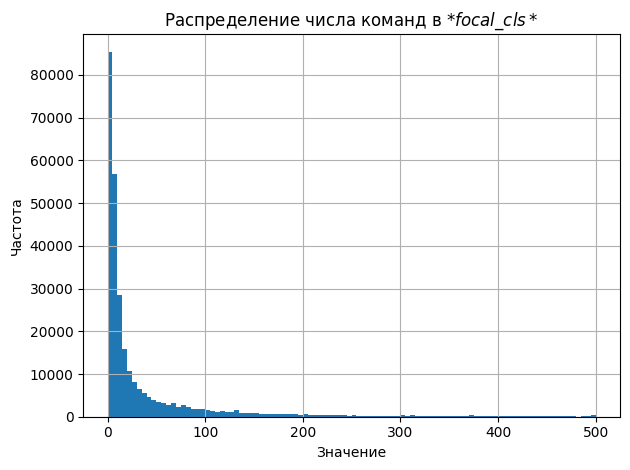

In [126]:
def plot_hist(data, bins = 30):
	'''Функция строит гистограмму по входному массиву данных'''
	plt.hist(data, bins=bins)
	plt.title('Распределение числа команд в $*focal\_cls*$')
	plt.xlabel('Значение')
	plt.ylabel('Частота')
	plt.tight_layout()
	plt.grid(True)
	plt.show()

plot_hist(code_dataset_copy['focal_cls_splitted_len'].values, bins = 100)

In [127]:
print(f"Среднее значение количества слов: {np.mean(code_dataset_copy['focal_cls_splitted_len']):.2f}")
print(f"Максимальное значение количества слов: {np.max(code_dataset_copy['focal_cls_splitted_len']):.2f}")
print(f"Число сэмплов с длиной слов меньше среднего: {len(code_dataset_copy[code_dataset_copy['focal_cls_splitted_len'] < 5])}")

Среднее значение количества слов: 36.44
Максимальное значение количества слов: 500.00
Число сэмплов с длиной слов меньше среднего: 85412


Очень много сэмплов с числом слов внутри *focal_cls* меньше 5. Посмотрим на них

In [128]:
code_dataset_copy[code_dataset_copy['focal_cls_splitted_len'] < 5]

,focal_method,focal_cls,masked_focal_method,focal_cls_splitted_len
0,"def get(self, key, default=None): kl = key.low...",<FUNC_TOKEN>,<FUNC_TOKEN>,0
3,"def mount(self, subapp, url_prefix=''): for me...",<FUNC_TOKEN>,<FUNC_TOKEN>,0
6,"def enum(word_sentences, tag_sentences): words...",<FUNC_TOKEN>,<FUNC_TOKEN>,0
7,"def update_instances(train_datas, params, mode...",<FUNC_TOKEN>,<FUNC_TOKEN>,0
9,"def release_lock(self, name): self._run_with_l...",<FUNC_TOKEN>,<FUNC_TOKEN>,0
...,...,...,...,...
281039,"def set_user(self, user: str) -> None: self.us...",<FUNC_TOKEN>,<FUNC_TOKEN>,0
281040,"def set_partition(self, partition: str) -> Non...",<FUNC_TOKEN>,<FUNC_TOKEN>,0
281045,def name(self) -> str: if self.filename: retur...,<FUNC_TOKEN>,<FUNC_TOKEN>,0
281057,"def process_seff_file(self, filename: str) -> ...",<FUNC_TOKEN>,<FUNC_TOKEN>,0


Подобные артефакты связаны с импортом библиотек, объявлением классов и прочими вещами, не связанными с логикой кода. Поэтому можем замаскировать подобные значения *focal_cls* для регуляризации

Помотрим на большие длины

In [129]:
code_dataset_copy[code_dataset_copy['focal_cls_splitted_len'] > 500].shape

(0, 4)

Большие последовательности тоже нам не нужны по причине ограниченности токенизации, поэтому можем замаскировать по эмпиричсекому порогу

In [130]:
code_dataset_copy['mask_focal_cls'] = (code_dataset_copy['focal_cls_splitted_len'] < 5) | (code_dataset_copy['focal_cls_splitted_len'] > 500)

In [131]:
code_dataset_copy.head()

,focal_method,focal_cls,masked_focal_method,focal_cls_splitted_len,mask_focal_cls
0,"def get(self, key, default=None): kl = key.low...",<FUNC_TOKEN>,<FUNC_TOKEN>,0,True
1,"def get(self, url_pattern): return self.route(...","class Microdot: def route(self, url_pattern, m...",<FUNC_TOKEN>,22,False
2,"def post(self, url_pattern): return self.route...","class Microdot: def route(self, url_pattern, m...",<FUNC_TOKEN>,22,False
3,"def mount(self, subapp, url_prefix=''): for me...",<FUNC_TOKEN>,<FUNC_TOKEN>,0,True
4,def iob2bio(tags): processed_tags = [] prev_st...,"def split_tag(tag: str): if tag in [""O"", ""-X-""...",<FUNC_TOKEN>,21,False


Добавляем колонку с булевым флагом маскирования колонок, связанных с *focal_cls*

In [132]:
code_dataset['mask_focal_cls_features'] = code_dataset_copy['mask_focal_cls']

И устанавливаем токены для регуляризации

In [134]:
def replace(row, column_replace, column_condition, token):
	'''Функция для замены значения column токеном'''
	if row[column_condition]:
		return row[column_replace].replace(row[column_replace], token)
	return row[column_replace]

code_dataset['focal_cls'] = code_dataset.progress_apply(replace, axis=1, args=('focal_cls', 'mask_focal_cls_features', '<FUNC_TOKEN>'))
code_dataset['focal_cls_ast'] = code_dataset.progress_apply(replace, axis=1, args=('focal_cls_ast', 'mask_focal_cls_features', '<AST_TOKEN>'))
code_dataset['focal_cls_info'] = code_dataset.progress_apply(replace, axis=1, args=('focal_cls_ast', 'mask_focal_cls_features', '<INFO_TOKEN>'))

100%|██████████| 280458/280458 [00:00<00:00, 331636.55it/s]


In [135]:
code_dataset.head()

,id,query,response,code_features,LANG_TOKEN,focal_method,focal_cls,focal_method_ast,focal_cls_ast,focal_method_info,focal_cls_info,mask_focal_cls_features,flag_empty
0,1,You are a professional python software enginee...,"from microdot import Microdot, Response, abort...","(python, ```python\ndef get(self, key, default...",python,"def get(self, key, default=None): kl = key.low...",<FUNC_TOKEN>,"Module( body=[ FunctionDef( name='get', args=a...",<AST_TOKEN>,<INFO_TOKEN>,<INFO_TOKEN>,True,True
1,2,You are a professional python software enginee...,"from microdot import Microdot, Response, abort...","(python, ```python\ndef get(self, url_pattern)...",python,"def get(self, url_pattern): return self.route(...","class Microdot: def route(self, url_pattern, m...","Module( body=[ FunctionDef( name='get', args=a...","Module( body=[ ClassDef( name='Microdot', base...",<DESCRIPTION_TOKEN> Decorator that is used to ...,"Module( body=[ ClassDef( name='Microdot', base...",False,False
2,3,You are a professional python software enginee...,"from microdot import Microdot, Response, abort...","(python, ```python\ndef post(self, url_pattern...",python,"def post(self, url_pattern): return self.route...","class Microdot: def route(self, url_pattern, m...","Module( body=[ FunctionDef( name='post', args=...","Module( body=[ ClassDef( name='Microdot', base...",<DESCRIPTION_TOKEN> Decorator that is used to ...,"Module( body=[ ClassDef( name='Microdot', base...",False,False
3,4,You are a professional python software enginee...,"from microdot import Microdot, Response, abort...","(python, ```python\ndef mount(self, subapp, ur...",python,"def mount(self, subapp, url_prefix=''): for me...",<FUNC_TOKEN>,"Module( body=[ FunctionDef( name='mount', args...",<AST_TOKEN>,"<DESCRIPTION_TOKEN> Mount a sub-application, o...",<INFO_TOKEN>,True,True
4,5,You are a professional python software enginee...,from pyner.named_entity.corpus import bio2bioe...,"(python, ```python\ndef iob2bio(tags):\n pr...",python,def iob2bio(tags): processed_tags = [] prev_st...,"def split_tag(tag: str): if tag in [""O"", ""-X-""...","Module( body=[ FunctionDef( name='iob2bio', ar...","Module( body=[ FunctionDef( name='split_tag', ...",<DESCRIPTION_TOKEN> should be bio format case1...,"Module( body=[ FunctionDef( name='split_tag', ...",False,False


Получили итоговый результат, проверим сколько комбинаций <FUNC_TOKEN>, <AST_TOKEN> и <INFO_TOKEN> в рамках *focal_cls*

In [136]:
code_dataset['flag_empty'] = (code_dataset['focal_cls'] == '<FUNC_TOKEN>') & (code_dataset['focal_cls_ast'] == '<AST_TOKEN>') \
					& (code_dataset['focal_cls_info'] == '<INFO_TOKEN>')

print(f"Количество замаскированных сэмплов для focal_cls: {len(code_dataset[code_dataset['flag_empty'] == True])}")
print(f"Количество замаскированных сэмплов для focal_cls: {len(code_dataset[code_dataset['flag_empty'] == True])/code_dataset.shape[0]:.2f}")
code_dataset = code_dataset.drop(columns=['flag_empty'])
code_dataset = code_dataset.drop(columns=['mask_focal_cls_features'])

Количество замаскированных сэмплов для focal_cls: 85412
Количество замаскированных сэмплов для focal_cls: 0.30


Итак, получили 30% замаскированных данных. Примерно этого и хотели достичь

In [137]:
code_dataset.head()

,id,query,response,code_features,LANG_TOKEN,focal_method,focal_cls,focal_method_ast,focal_cls_ast,focal_method_info,focal_cls_info
0,1,You are a professional python software enginee...,"from microdot import Microdot, Response, abort...","(python, ```python\ndef get(self, key, default...",python,"def get(self, key, default=None): kl = key.low...",<FUNC_TOKEN>,"Module( body=[ FunctionDef( name='get', args=a...",<AST_TOKEN>,<INFO_TOKEN>,<INFO_TOKEN>
1,2,You are a professional python software enginee...,"from microdot import Microdot, Response, abort...","(python, ```python\ndef get(self, url_pattern)...",python,"def get(self, url_pattern): return self.route(...","class Microdot: def route(self, url_pattern, m...","Module( body=[ FunctionDef( name='get', args=a...","Module( body=[ ClassDef( name='Microdot', base...",<DESCRIPTION_TOKEN> Decorator that is used to ...,"Module( body=[ ClassDef( name='Microdot', base..."
2,3,You are a professional python software enginee...,"from microdot import Microdot, Response, abort...","(python, ```python\ndef post(self, url_pattern...",python,"def post(self, url_pattern): return self.route...","class Microdot: def route(self, url_pattern, m...","Module( body=[ FunctionDef( name='post', args=...","Module( body=[ ClassDef( name='Microdot', base...",<DESCRIPTION_TOKEN> Decorator that is used to ...,"Module( body=[ ClassDef( name='Microdot', base..."
3,4,You are a professional python software enginee...,"from microdot import Microdot, Response, abort...","(python, ```python\ndef mount(self, subapp, ur...",python,"def mount(self, subapp, url_prefix=''): for me...",<FUNC_TOKEN>,"Module( body=[ FunctionDef( name='mount', args...",<AST_TOKEN>,"<DESCRIPTION_TOKEN> Mount a sub-application, o...",<INFO_TOKEN>
4,5,You are a professional python software enginee...,from pyner.named_entity.corpus import bio2bioe...,"(python, ```python\ndef iob2bio(tags):\n pr...",python,def iob2bio(tags): processed_tags = [] prev_st...,"def split_tag(tag: str): if tag in [""O"", ""-X-""...","Module( body=[ FunctionDef( name='iob2bio', ar...","Module( body=[ FunctionDef( name='split_tag', ...",<DESCRIPTION_TOKEN> should be bio format case1...,"Module( body=[ FunctionDef( name='split_tag', ..."


In [138]:
code_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 280458 entries, 0 to 281059
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id                 280458 non-null  int64 
 1   query              280458 non-null  object
 2   response           280458 non-null  object
 3   code_features      280458 non-null  object
 4   LANG_TOKEN         280458 non-null  object
 5   focal_method       280458 non-null  object
 6   focal_cls          280458 non-null  object
 7   focal_method_ast   280458 non-null  object
 8   focal_cls_ast      280458 non-null  object
 9   focal_method_info  280458 non-null  object
 10  focal_cls_info     280458 non-null  object
dtypes: int64(1), object(10)
memory usage: 25.7+ MB


In [ ]:
code_dataset.to_parquet('code_dataset.parquet', engine='pyarrow')

In [161]:
code_dataset = code_dataset.drop(columns = ['id', 'query', 'code_features', 'LANG_TOKEN'])

In [162]:
def create_input_string(row, columns_array):
    '''Функция превратит строки кололнок в одну общую строку-input'''
    strings_array = [row[column] for column in columns_array]
    return " ".join(strings_array)

def insert_token(row, column, token):
    '''Функция вставляет токен в начало частей input-строки'''
    if (row[column] == token):
        return row[column]
    return (token + " " + row[column])

code_dataset['focal_method'] = code_dataset.progress_apply(insert_token, axis = 1, args = ('focal_method', '<FUNC_TOKEN>'))
code_dataset['focal_method_info'] = code_dataset.progress_apply(insert_token, axis = 1, args = ('focal_method_info', '<INFO_TOKEN>'))
code_dataset['focal_method_ast'] = code_dataset.progress_apply(insert_token, axis = 1, args = ('focal_method_ast', '<AST_TOKEN>'))

code_dataset['focal_cls'] = code_dataset.progress_apply(insert_token, axis = 1, args = ('focal_cls', '<CLS_TOKEN>'))
code_dataset['focal_cls_info'] = code_dataset.progress_apply(insert_token, axis = 1, args = ('focal_cls_info', '<INFO_TOKEN>'))
code_dataset['focal_cls_ast'] = code_dataset.progress_apply(insert_token, axis = 1, args = ('focal_cls_ast', '<AST_TOKEN>'))

code_dataset['input_string_focal_method'] = code_dataset.progress_apply(create_input_string, 
                                                                        axis=1, 
                                                                        args=(['focal_method', 'focal_method_info', 'focal_method_ast'], ))

code_dataset['input_string_focal_cls'] = code_dataset.progress_apply(create_input_string, 
                                                                        axis=1, 
                                                                        args=(['focal_cls', 'focal_cls_info', 'focal_cls_ast'], ))
    

100%|██████████| 280458/280458 [00:02<00:00, 99016.64it/s] 


In [163]:
code_dataset.shape

(280458, 9)

In [164]:
code_dataset.head()

,response,focal_method,focal_cls,focal_method_ast,focal_cls_ast,focal_method_info,focal_cls_info,input_string_focal_method,input_string_focal_cls
0,"from microdot import Microdot, Response, abort...","<FUNC_TOKEN> def get(self, key, default=None):...",<CLS_TOKEN> <FUNC_TOKEN>,<AST_TOKEN> Module( body=[ FunctionDef( name='...,<AST_TOKEN>,<INFO_TOKEN>,<INFO_TOKEN>,"<FUNC_TOKEN> def get(self, key, default=None):...",<CLS_TOKEN> <FUNC_TOKEN> <INFO_TOKEN> <AST_TOKEN>
1,"from microdot import Microdot, Response, abort...","<FUNC_TOKEN> def get(self, url_pattern): retur...","<CLS_TOKEN> class Microdot: def route(self, ur...",<AST_TOKEN> Module( body=[ FunctionDef( name='...,<AST_TOKEN> Module( body=[ ClassDef( name='Mic...,<INFO_TOKEN> <DESCRIPTION_TOKEN> Decorator tha...,<INFO_TOKEN> Module( body=[ ClassDef( name='Mi...,"<FUNC_TOKEN> def get(self, url_pattern): retur...","<CLS_TOKEN> class Microdot: def route(self, ur..."
2,"from microdot import Microdot, Response, abort...","<FUNC_TOKEN> def post(self, url_pattern): retu...","<CLS_TOKEN> class Microdot: def route(self, ur...",<AST_TOKEN> Module( body=[ FunctionDef( name='...,<AST_TOKEN> Module( body=[ ClassDef( name='Mic...,<INFO_TOKEN> <DESCRIPTION_TOKEN> Decorator tha...,<INFO_TOKEN> Module( body=[ ClassDef( name='Mi...,"<FUNC_TOKEN> def post(self, url_pattern): retu...","<CLS_TOKEN> class Microdot: def route(self, ur..."
3,"from microdot import Microdot, Response, abort...","<FUNC_TOKEN> def mount(self, subapp, url_prefi...",<CLS_TOKEN> <FUNC_TOKEN>,<AST_TOKEN> Module( body=[ FunctionDef( name='...,<AST_TOKEN>,<INFO_TOKEN> <DESCRIPTION_TOKEN> Mount a sub-a...,<INFO_TOKEN>,"<FUNC_TOKEN> def mount(self, subapp, url_prefi...",<CLS_TOKEN> <FUNC_TOKEN> <INFO_TOKEN> <AST_TOKEN>
4,from pyner.named_entity.corpus import bio2bioe...,<FUNC_TOKEN> def iob2bio(tags): processed_tags...,<CLS_TOKEN> def split_tag(tag: str): if tag in...,<AST_TOKEN> Module( body=[ FunctionDef( name='...,<AST_TOKEN> Module( body=[ FunctionDef( name='...,<INFO_TOKEN> <DESCRIPTION_TOKEN> should be bio...,<INFO_TOKEN> Module( body=[ FunctionDef( name=...,<FUNC_TOKEN> def iob2bio(tags): processed_tags...,<CLS_TOKEN> def split_tag(tag: str): if tag in...


In [165]:
print(code_dataset['input_string_focal_method'].values[0])

<FUNC_TOKEN> def get(self, key, default=None): kl = key.lower() return super().get(self.keymap.get(kl, kl), default) <INFO_TOKEN> <AST_TOKEN> Module( body=[ FunctionDef( name='get', args=arguments( posonlyargs=[], args=[ arg(arg='self'), arg(arg='key'), arg(arg='default')], kwonlyargs=[], kw_defaults=[], defaults=[ Constant(value=None)]), body=[ Assign( targets=[ Name(id='kl', ctx=Store())], value=Call( func=Attribute( value=Name(id='key', ctx=Load()), attr='lower', ctx=Load()), args=[], keywords=[])), Return( value=Call( func=Attribute( value=Call( func=Name(id='super', ctx=Load()), args=[], keywords=[]), attr='get', ctx=Load()), args=[ Call( func=Attribute( value=Attribute( value=Name(id='self', ctx=Load()), attr='keymap', ctx=Load()), attr='get', ctx=Load()), args=[ Name(id='kl', ctx=Load()), Name(id='kl', ctx=Load())], keywords=[]), Name(id='default', ctx=Load())], keywords=[]))], decorator_list=[], type_params=[])], type_ignores=[])
